# Testing
### Leerflächen nach Stadtquartier und Nutzungsart, seit 2010
Datum: 22.11.2021

**Importiere die notwendigen Packages**

In [1]:
# Empfehlung für Colab: Installiere alles was Du brauchst
# %pip install pandas pivottablejs numpy altair matplotlib geopandas folium

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bau_leerflaechengeb_geb_nutzungsart_quartier_jahr_OD5436

(int_dwh)

In [4]:
#Die Datasets sind nur zum Testen auf INT-DWH-Dropzone. Wenn der Test vorbei ist, sind sie auf PROD. 
# Über den Status kann man einfach switchen

status = "int";
print(status)

int


In [5]:
# Filepath
if status == "prod":
    fp = r"\\szh\ssz\applikationen\OGD_Dropzone\DWH\bau_leerflaechengeb_geb_nutzungsart_quartier_jahr_OD5436\BAU543OD5436.csv"

else:
    fp = r"\\szh\ssz\applikationen\OGD_Dropzone\INT_DWH\bau_leerflaechengeb_geb_nutzungsart_quartier_jahr_OD5436\BAU543OD5436.csv"

print(fp)

\\szh\ssz\applikationen\OGD_Dropzone\INT_DWH\bau_leerflaechengeb_geb_nutzungsart_quartier_jahr_OD5436\BAU543OD5436.csv


In [6]:
# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )
print('done')

done


In der Folge ein paar erste Tests:

In [7]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [8]:
data2betested.head(300)

,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
0,2010,11,Rathaus,1,Kreis 1,Lager,48,NaN,NaN
1,2010,12,Hochschulen,1,Kreis 1,Lager,150,NaN,NaN
2,2010,12,Hochschulen,1,Kreis 1,Büro,630,196387,0
3,2010,13,Lindenhof,1,Kreis 1,Andere,854,NaN,NaN
4,2010,13,Lindenhof,1,Kreis 1,Büro,923,194404,0
...,...,...,...,...,...,...,...,...,...
295,2013,61,Unterstrass,6,Kreis 6,Lager,1120,NaN,NaN
296,2013,63,Oberstrass,6,Kreis 6,Lager,49,NaN,NaN
297,2013,63,Oberstrass,6,Kreis 6,Büro,245,299033,0
298,2013,71,Fluntern,7,Kreis 7,Lager,66,NaN,NaN


In [11]:
data2betested.dtypes

StichtagDatJahr      int64
QuarSort             int64
QuarLang            object
KreisSort            int64
KreisLang           object
Nutzung             object
Leerflaeche          int64
BueroNettofl       float64
BueroLeerProz      float64
dtype: object

In [12]:
data2betested.shape

(1005, 9)

Beschreibe einzelne Attribute

In [13]:
data2betested.describe()

,StichtagDatJahr,QuarSort,KreisSort,Leerflaeche,BueroNettofl,BueroLeerProz
count,1005,1005,1005,1005,343,343
mean,2016,64,6,2408,209386,2
std,3,46,5,5516,165861,2
min,2010,11,1,7,3359,0
25%,2012,31,3,175,63701,1
50%,2016,61,6,528,167841,1
75%,2019,92,9,1873,315994,4
max,2021,999,99,57629,582531,13


Wie viele Nullwerte gibt es im Datensatz?

In [14]:
data2betested.isnull().sum()

StichtagDatJahr      0
QuarSort             0
QuarLang             0
KreisSort            0
KreisLang            0
Nutzung              0
Leerflaeche          0
BueroNettofl       662
BueroLeerProz      662
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [15]:
data2betested['StichtagDatJahr']=pd.to_datetime(data2betested['StichtagDatJahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested



,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
0,2010-01-01,11,Rathaus,1,Kreis 1,Lager,48,NaN,NaN
1,2010-01-01,12,Hochschulen,1,Kreis 1,Lager,150,NaN,NaN
2,2010-01-01,12,Hochschulen,1,Kreis 1,Büro,630,196387,0
3,2010-01-01,13,Lindenhof,1,Kreis 1,Andere,854,NaN,NaN
4,2010-01-01,13,Lindenhof,1,Kreis 1,Büro,923,194404,0
...,...,...,...,...,...,...,...,...,...
1000,2021-01-01,119,Seebach,11,Kreis 11,Verkauf,1031,NaN,NaN
1001,2021-01-01,119,Seebach,11,Kreis 11,Lager,5544,NaN,NaN
1002,2021-01-01,119,Seebach,11,Kreis 11,Büro,34374,527244,6
1003,2021-01-01,121,Saatlen,12,Kreis 12,Büro,892,13973,6


Bereite die Daten für die Grafik unten vor

In [16]:
Jahre = data2betested.groupby("StichtagDatJahr")
len(Jahre)

12

In [17]:
for key, group in Jahre:
    print(key, len(group))

2010-01-01 00:00:00 88
2011-01-01 00:00:00 84
2012-01-01 00:00:00 81
2013-01-01 00:00:00 82
2014-01-01 00:00:00 77
2015-01-01 00:00:00 75
2016-01-01 00:00:00 79
2017-01-01 00:00:00 90
2018-01-01 00:00:00 92
2019-01-01 00:00:00 91
2020-01-01 00:00:00 87
2021-01-01 00:00:00 79


In [18]:
myJahr = "2021-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr.head(3)


,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
926,2021-01-01,11,Rathaus,1,Kreis 1,Büro,373,103999,0
927,2021-01-01,11,Rathaus,1,Kreis 1,Andere,245,NaN,NaN
928,2021-01-01,11,Rathaus,1,Kreis 1,Werkstatt,304,NaN,NaN


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [19]:
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

    

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [20]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [21]:
mySelection = data2betested[(data2betested.StichtagDatJahr=="2021") & (data2betested.QuarSort >1)]
mySelection

,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
926,2021-01-01,11,Rathaus,1,Kreis 1,Büro,373,103999,0
927,2021-01-01,11,Rathaus,1,Kreis 1,Andere,245,NaN,NaN
928,2021-01-01,11,Rathaus,1,Kreis 1,Werkstatt,304,NaN,NaN
929,2021-01-01,11,Rathaus,1,Kreis 1,Lager,809,NaN,NaN
930,2021-01-01,12,Hochschulen,1,Kreis 1,Verkauf,170,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1000,2021-01-01,119,Seebach,11,Kreis 11,Verkauf,1031,NaN,NaN
1001,2021-01-01,119,Seebach,11,Kreis 11,Lager,5544,NaN,NaN
1002,2021-01-01,119,Seebach,11,Kreis 11,Büro,34374,527244,6
1003,2021-01-01,121,Saatlen,12,Kreis 12,Büro,892,13973,6


In [22]:
agg_mySelection = mySelection.groupby(['StichtagDatJahr', 'KreisSort', 'KreisLang', 'Nutzung', 'Leerflaeche', 'BueroNettofl']
).agg({'Leerflaeche':('sum'),'BueroNettofl': ('sum')}
)
agg_mySelection.head(2)

Leerflaeche  BueroNettofl
StichtagDatJahr KreisSort KreisLang Nutzung Leerflaeche BueroNettofl                           
2021-01-01      1         Kreis 1   Büro    300         194642                300        194642
                                            373         103999                373        103999

In [23]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['Nutzung'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='QuarLang',
    y='Leerflaeche',
    color='Nutzung'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [24]:
alt.Chart(data2betested).mark_circle(size=60).encode(
    x='StichtagDatJahr',
    y='Leerflaeche',
    #color='Nutzung',
    #color=alt.Color('AnzNat', scale=alt.Scale(scheme='dark2')),
    color=alt.Color('Nutzung', scale=alt.Scale(scheme='greens')),
    tooltip=['StichtagDatJahr','QuarLang','Nutzung','Leerflaeche']
).interactive() # this makes the axes interactive: now you can zoom & pan




alt.Chart(...)

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [25]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Wenn die Daten lokal agelegt sind, dann kannst Du folgendes machen:
##input_stadtquartiere = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statistische_quartiere_map.json"
##df_stadtquartiere = gpd.read_file(input_stadtquartiere)
##df_stadtquartiere.head(2)
#df_stadtkreise.dtypes

geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(geojson_url)

df_adm_statistische_quartiere_map.head(5)


NameError: name 'gpd' is not defined

Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [26]:
mySelection.head(2)

,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
926,2021-01-01,11,Rathaus,1,Kreis 1,Büro,373,103999,0
927,2021-01-01,11,Rathaus,1,Kreis 1,Andere,245,NaN,NaN


In [89]:
selectMapAttr1 = data2betested[(data2betested.StichtagDatJahr=="2021") & (data2betested.Nutzung =="Büro")] #& (data2betested.QuarSort > 30)
selectMapAttr1.head(2)
#stats_agg_quartiere=aktuellesJahr.groupby(['Jahr', 'QuarSort'])['AnzWhg','Wohnungsfl', 'PersInGeb'].sum()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()


,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
926,2021-01-01,11,Rathaus,1,Kreis 1,Büro,373,103999,0
931,2021-01-01,12,Hochschulen,1,Kreis 1,Büro,300,194642,0


Was ist mit Leimbach los?

In [90]:
leimbach = data2betested[(data2betested.StichtagDatJahr<"2021") & (data2betested.QuarLang =="Leimbach")] #& (data2betested.QuarSort > 30)
leimbach

,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
184,2012-01-01,23,Leimbach,2,Kreis 2,Andere,224,NaN,NaN
348,2014-01-01,23,Leimbach,2,Kreis 2,Andere,115,NaN,NaN
349,2014-01-01,23,Leimbach,2,Kreis 2,Verkauf,228,NaN,NaN
350,2014-01-01,23,Leimbach,2,Kreis 2,Büro,58,3359,2
854,2020-01-01,23,Leimbach,2,Kreis 2,Büro,40,3638,1


Und was mit Hard?

In [92]:
#hard = data2betested[(data2betested.StichtagDatJahr<"2021") & (data2betested.QuarLang =="Hard")] #& (data2betested.QuarSort > 30)
#hard

In [74]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

stadtquartiere_shapes = df_adm_statistische_quartiere_map[['geometry', 'qnr', 'qname', 'knr']].rename(columns={'qnr': 'QuarSort'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
stadtquartiere_shapes_joined = stadtquartiere_shapes.merge(selectMapAttr1, on='QuarSort')

stadtquartiere_shapes_joined.head(2)


,geometry,QuarSort,qname,knr,StichtagDatJahr,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",73,Hirslanden,7,2021-01-01,Hirslanden,7,Kreis 7,Büro,224,51117,0
1,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ...",83,Weinegg,8,2021-01-01,Weinegg,8,Kreis 8,Büro,265,62546,0


<AxesSubplot:>

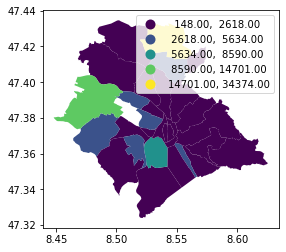

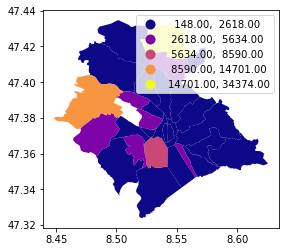

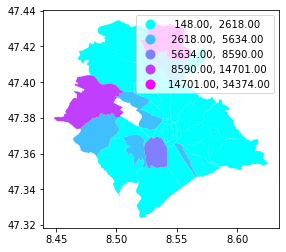

In [75]:
# Plot by StatQuartiere
# Weitere Schemes: scheme='quantiles', scheme='fisherjenks', scheme='natural_breaks',

stadtquartiere_shapes_joined.plot(column='Leerflaeche', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stadtquartiere_shapes_joined.plot(column='Leerflaeche', cmap='plasma', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stadtquartiere_shapes_joined.plot(column='Leerflaeche', cmap='cool', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

**Sharepoint als gecheckt markieren!**

Record auf Sharepoint: **[Link](http://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/EditForm.aspx?ID=157&Source=%2Forga%2Fssz%2Dprodukte%2FLists%2FSASA%5FOutputs)**